In [1]:
# Centralized sonar defaults (inserted by sweep)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible variable names used in older notebooks
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

# Optional: override defaults below, e.g.
# RANGE_MAX_M = 30.0

In [ ]:
# Setup visualizer and default file selection
from pathlib import Path
from utils.sonar_visualization import SonarVisualizer
from utils.sonar_config import EXPORTS_DIR_DEFAULT, EXPORTS_SUBDIRS

# Configure exports root and by-bag folder
EXPORTS_ROOT = Path(EXPORTS_DIR_DEFAULT)
BY_BAG = EXPORTS_ROOT / EXPORTS_SUBDIRS.get('by_bag', 'by_bag')

# Instantiate the visualizer with central defaults
viz = SonarVisualizer()

# Discover candidate sonar CSVs and pick a sensible default
candidates = viz.find_sonar_files(BY_BAG)
if not candidates:
    # Fallback: try global search
    candidates = viz.find_sonar_files()

if candidates:
    DATA_FILE = str(candidates[0])
    print(f" Using first discovered sonar file: {DATA_FILE}")
else:
    DATA_FILE = ""
    print("  No sonar csv files found under exports/by_bag/ — set DATA_FILE manually")

# Default frame index to 0
FRAME_INDEX = 0

# Helpful debug info
print(f"Exports by-bag folder: {BY_BAG}")
print(f"Found candidates: {len(candidates)}")

🔎 Using first discovered sonar file: /Volumes/LaCie/SOLAQUA/exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-39-34_video.csv
Exports by-bag folder: /Volumes/LaCie/SOLAQUA/exports/by_bag
Found candidates: 17


# SOLAQUA — Sonar Visualizer

This notebook provides an easy-to-use interface for visualizing sonar data from **Sonoptix** and **Ping360** systems.

1. **Run the setup cell** to scan for available sonar files
2. **Configure your settings** in the configuration cell
3. **Visualize your data** using the plotting cells
4. **Analyze statistics** to understand your data quality

All the heavy lifting is now handled by the `sonar_visualization` utility module!

## Configuration and Data Selection

Set your file path and visualization parameters here. The configuration is organized into logical groups for easy adjustment.

In [ ]:
# Use centralized sonar defaults (replaces local dict)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible names
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

print(f" FOV: {sonar_config['fov_deg']}, Range: {RANGE_MIN_M}-{RANGE_MAX_M}m (display max {DISPLAY_RANGE_MAX_M}m)")

📐 FOV: 120.0, Range: 0.0-20.0m (display max 5.0m)


Loaded 699 rows with columns: ['t', 't_header', 't_bag', 't_src', 'bag', 'bag_file', 'topic', 'dim_labels', 'dim_sizes', 'dim_strides', 'data_offset', 'dtype', 'len_data', 'payload_sha256', 'used_shape', 'policy', 'warnings', 'data', 'len', 't0', 't_rel', 'ts_utc', 'ts_oslo']
📊 Frame 0 shape: (1024, 256)
📈 Data range: 0.000 to 49.000


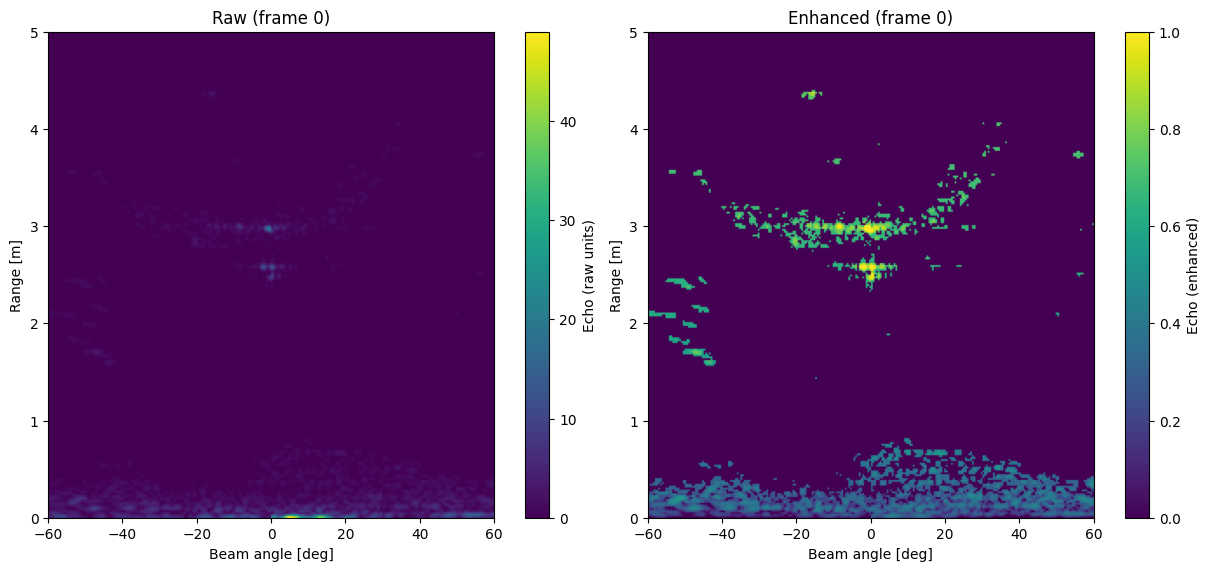

✅ Frame data loaded and ready for cone visualization


In [ ]:
# === Raw and Enhanced Intensity Display ===
import matplotlib.pyplot as plt

# Load data and extract frame (guard if DATA_FILE is not set)
if not DATA_FILE:
    raise FileNotFoundError("DATA_FILE is not set. Run the setup cell and provide a valid sonar CSV file path.")

# Load dataframe using the visualizer helper
try:
    df = viz.load_sonar_data(DATA_FILE)
except Exception as e:
    raise RuntimeError(f"Failed to load sonar data from {DATA_FILE}: {e}")

# Ensure FRAME_INDEX is within bounds
FRAME_INDEX = int(FRAME_INDEX)
if FRAME_INDEX < 0:
    FRAME_INDEX = 0

frame_data = viz.get_frame_data(df, FRAME_INDEX)

print(f" Frame {FRAME_INDEX} shape: {frame_data.shape}")
print(f" Data range: {frame_data.min():.3f} to {frame_data.max():.3f}")

# Create side-by-side visualization
fig = viz.plot_raw_and_enhanced(frame_data, FRAME_INDEX)
plt.show()

# Store data for cone view
current_frame_data = frame_data
print(" Frame data loaded and ready for cone visualization")

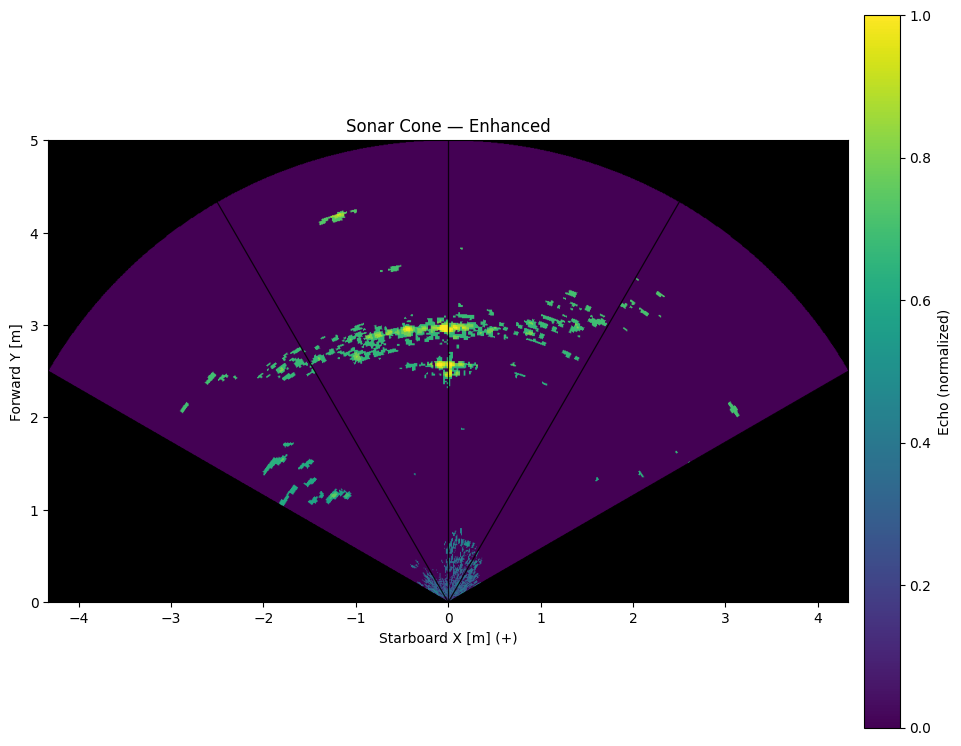

✅ Cone view displayed
💡 The cone shows the sonar data mapped to real-world coordinates
   - X-axis: Starboard direction (positive to the right)
   - Y-axis: Forward direction
   - Black lines: Beam angle references
   - Black areas: Outside the sonar's field of view


In [ ]:
# === Geometric Cone View ===
import matplotlib.pyplot as plt

if 'current_frame_data' not in globals():
    raise RuntimeError("No current_frame_data available. Run the previous cell to load a frame first.")

# Create cone visualization (using enhanced data by default)
fig = viz.plot_cone_view(current_frame_data, use_enhanced=True)
plt.show()

print(" Cone view displayed")
print(" The cone shows the sonar data mapped to real-world coordinates")
print("   - X-axis: Starboard direction (positive to the right)")  
print("   - Y-axis: Forward direction")
print("   - Black lines: Beam angle references")
print("   - Black areas: Outside the sonar's field of view")